# I. Understand your data with descriptive statistics

### 1.1 Peak at your data

In [19]:
import pandas as pd
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv("pima-indians-diabetes.csv", names=names) # dữ liệu chuẩn đoán bệnh tiểu đường
peek = data.head(20)
print(peek)

    preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1
5      5   116    74     0     0  25.6  0.201   30      0
6      3    78    50    32    88  31.0  0.248   26      1
7     10   115     0     0     0  35.3  0.134   29      0
8      2   197    70    45   543  30.5  0.158   53      1
9      8   125    96     0     0   0.0  0.232   54      1
10     4   110    92     0     0  37.6  0.191   30      0
11    10   168    74     0     0  38.0  0.537   34      1
12    10   139    80     0     0  27.1  1.441   57      0
13     1   189    60    23   846  30.1  0.398   59      1
14     5   166    72    19   175  25.8  0.587   51      1
15     7   100     0     0     0  30.0  0.484   32      1
16     0   118

### 1.2 Dimesions of your Data

In [20]:
shape = data.shape
print(shape)

(768, 9)


Bộ dữ liệu có 768 hàng và 9 cột

### 1.3 Data type of each Attribute

Loại của Atribute thì quan trọng.<br> 
- String thì có thể nên được convert về Floating point values.
- Integer đại diện cho Categorical hoặc Ordinal value.

In [21]:
types = data.dtypes
print(types)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


### 1.4 Descriptive Statistics

In [25]:
pd.set_option('display.width', 100) # độ rộng của output
pd.set_option('precision', 3) # độ chính xác tới 3 trong float
description = data.describe()
description

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


### 1.5 Class Distribution (Classification Only)

Trong vấn đề về phân loại, bạn cần biết dữ liệu của _class cần được phân loại_ cân bằng như thế nào.<br>
Việc dữ liệu mất cân bằng lớn (rất nhiều quan sát trong class cần được phân loại đó thì chệch hẳn về một label) thì rất phổ biến và cần những cách xử lý đặc biệt trong giai đoạn chuẩn bị dữ liệu. 

In [29]:
class_counts = data.groupby('class').size()
print(class_counts)

class
0    500
1    268
dtype: int64


In [30]:
# another way
data['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

### 1.6 Correlations between Attributes

- Correlation quy về mối quan hệ giữa 2 biến, và liệu chúng có thay đổi hoặc không thay đổi cùng nhau. Phương thức phổ biến nhất cho việc tính toán Correlation là **Pearson’s Correlation Coefficient**, giả sử các attribute liên quan trong một _phân phối chuẩn_.
- Mối tương quan (correlation) từ -1 hay 1 thể hiện mối tương quan nghịch hay thuận (theo thứ tự). Trong khi ở giá trị 0 tức là không có mối tương quan.
- Chú ý, một vài thuật toán trong linear và logistic regression có thể trở nên mất hiệu quả, nếu các attribute có _độ tương quan cao_ trong dữ liệu.

In [31]:
correlations = data.corr(method='pearson')
correlations

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
plas,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
pres,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
skin,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
test,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
mass,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
pedi,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
class,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


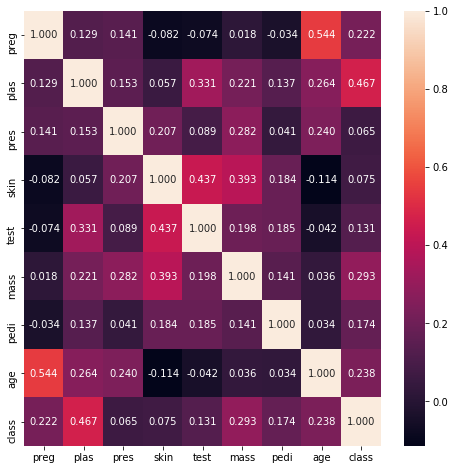

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(correlations,
           xticklabels=correlations.columns.values,
           yticklabels=correlations.columns.values,
           annot=True, fmt='.3f')

### 1.7 Skew of Univariate Distributions

- Skew quy về một phân phối được cho là phân phối Gaussian (phân phối chuẩn hay phân phối hình chuông)
- Nhiều thuật toán machine learning ứng với phân phối Gaussian. Biết skew của Attritube cho phép bạn tiến hành chuẩn bị dữ liệu để sửa chữa skew và sau đó là cải thiện độ chính xác của mô hình.

In [37]:
skew = data.skew()
print(skew)

preg     0.902
plas     0.174
pres    -1.844
skin     0.109
test     2.272
mass    -0.429
pedi     1.920
age      1.130
class    0.635
dtype: float64


Bảng kết quả của độ cân xứng (skew). Trong đó dương (lệch phải), âm (lệch trái). Dữ liệu càng gần về 0 cho thấy ít bị lệch.